In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações para os gráficos
try:
    df = pd.read_csv('benchmark_results.csv')
except FileNotFoundError:
    print("Erro: Arquivo 'benchmark_results.csv' não encontrado.")
    print("Por favor, faça o upload do arquivo para o Colab.")
else:
    print("Dados carregados com sucesso:")
    print(df.head())

Dados carregados com sucesso:
  distribuicao  n_pontos  n_envoltoria  tempo_us
0       random       100            10     38.68
1       circle       100           100     20.76
2    rectangle       100             4     23.08
3       random       500            15    217.76
4       circle       500           500     67.84


# Crescimento do Tempo vs. N de Pontos


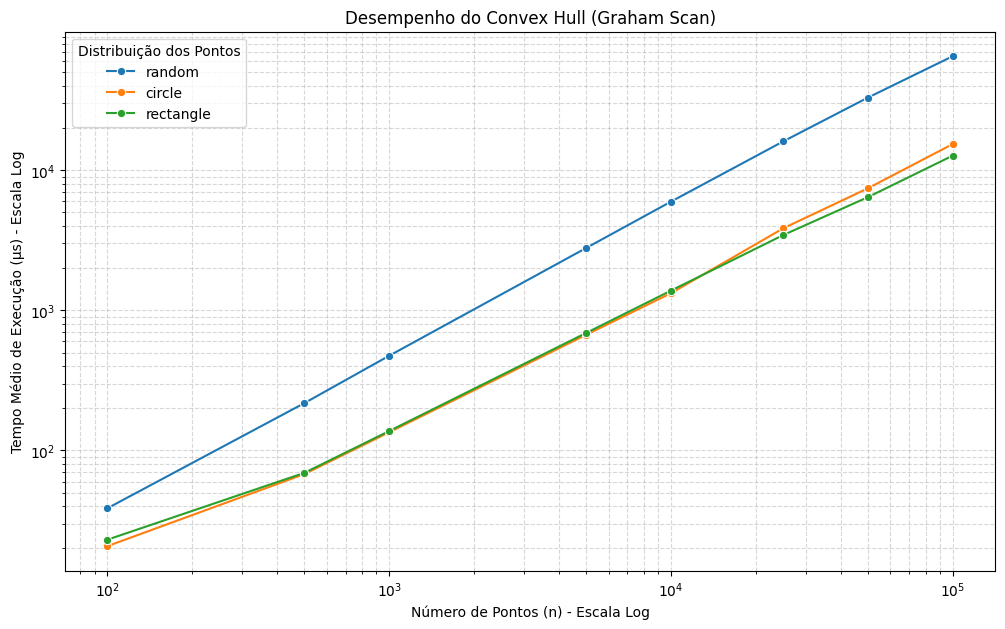

In [9]:
    # (Crescimento conforme mais pontos são adicionados)
    plt.figure(figsize=(12, 7))
    sns.lineplot(
        data=df,
        x='n_pontos',
        y='tempo_us',
        hue='distribuicao',  # Cores diferentes para cada tipo de ponto
        marker='o'
    )
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Desempenho do Convex Hull (Graham Scan)')
    plt.xlabel('Número de Pontos (n) - Escala Log')
    plt.ylabel('Tempo Médio de Execução (µs) - Escala Log')
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.legend(title='Distribuição dos Pontos')
    plt.show()



# Comportamento do Algoritmo (Verificação O(n log n))

<Figure size 1200x700 with 0 Axes>

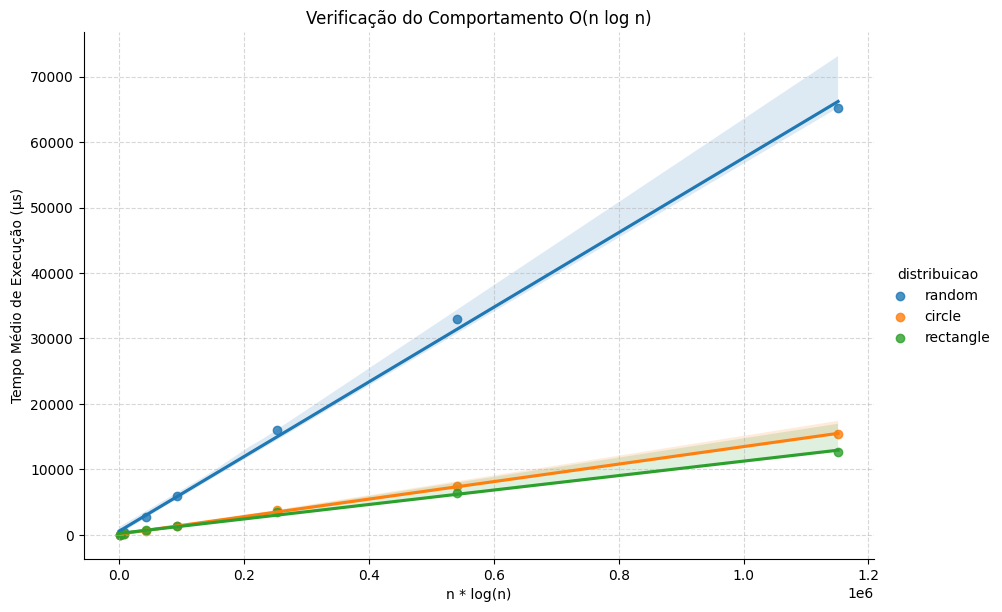

In [8]:
    # Se o algoritmo é O(n log n), o tempo de execução (y) deve ser
    # linearmente proporcional a (n * log(n)) (x).
    #
    # Tempo(n) ≈ C * (n * log(n))  (onde C é uma constante)
    #
    # Este gráfico plota Tempo(n) vs. (n * log(n)).
    # Se o resultado for uma linha reta, confirma o comportamento esperado de O(n log n).
    df['n_log_n'] = df['n_pontos'] * np.log(df['n_pontos'])

    plt.figure(figsize=(12, 7))
    sns.lmplot(
        data=df,
        x='n_log_n',
        y='tempo_us',
        hue='distribuicao',
        height=6,
        aspect=1.5
    )

    plt.title('Verificação do Comportamento O(n log n)')
    plt.xlabel('n * log(n)')
    plt.ylabel('Tempo Médio de Execução (µs)')
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.show()